In [143]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt

In [144]:
start = datetime.strptime('2004-01-02','%Y-%m-%d')
end = datetime.strptime('2009-6-30','%Y-%m-%d')

df = data.DataReader('^HSI',start=start, end=end, data_source='yahoo')
df = df[:1500]['Close']

In [145]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(df).reshape(-1,1))

In [146]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:]

In [147]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [148]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [149]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [150]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout

In [151]:
model=Sequential() 
model.add(LSTM(100,return_sequences=True,input_shape=(100,1))) 
model.add(LSTM(100,return_sequences=True))
model.add(Dense(16,activation='relu'))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [152]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 4s 304ms/step - loss: 0.0259 - val_loss: 0.0605
Epoch 2/100
13/13 [==============================] - 3s 207ms/step - loss: 0.0087 - val_loss: 0.0143
Epoch 3/100
13/13 [==============================] - 3s 207ms/step - loss: 0.0028 - val_loss: 0.0082
Epoch 4/100
13/13 [==============================] - 3s 208ms/step - loss: 8.9940e-04 - val_loss: 0.0060
Epoch 5/100
13/13 [==============================] - 3s 226ms/step - loss: 7.3119e-04 - val_loss: 0.0057
Epoch 6/100
13/13 [==============================] - 3s 229ms/step - loss: 6.0859e-04 - val_loss: 0.0060
Epoch 7/100
13/13 [==============================] - 3s 241ms/step - loss: 5.5351e-04 - val_loss: 0.0065
Epoch 8/100
13/13 [==============================] - 3s 236ms/step - loss: 5.2960e-04 - val_loss: 0.0067
Epoch 9/100
13/13 [==============================] - 3s 220ms/step - loss: 5.6000e-04 - val_loss: 0.0086
Epoch 10/100
13/13 [==============================] - 3s 222ms/step

13/13 [==============================] - 4s 294ms/step - loss: 2.5197e-04 - val_loss: 0.0030
Epoch 79/100
13/13 [==============================] - 3s 232ms/step - loss: 2.2527e-04 - val_loss: 0.0032
Epoch 80/100
13/13 [==============================] - 3s 233ms/step - loss: 2.2307e-04 - val_loss: 0.0027
Epoch 81/100
13/13 [==============================] - 3s 239ms/step - loss: 2.6854e-04 - val_loss: 0.0030
Epoch 82/100
13/13 [==============================] - 3s 237ms/step - loss: 2.4082e-04 - val_loss: 0.0027
Epoch 83/100
13/13 [==============================] - 3s 240ms/step - loss: 2.9759e-04 - val_loss: 0.0030
Epoch 84/100
13/13 [==============================] - 3s 243ms/step - loss: 2.4207e-04 - val_loss: 0.0029
Epoch 85/100
13/13 [==============================] - 3s 260ms/step - loss: 2.1315e-04 - val_loss: 0.0028
Epoch 86/100
13/13 [==============================] - 3s 262ms/step - loss: 2.3127e-04 - val_loss: 0.0028
Epoch 87/100
13/13 [==============================] - 3s 24

In [153]:
model_origin=Sequential() 
model_origin.add(LSTM(50,return_sequences=True,input_shape=(100,1))) 
model_origin.add(LSTM(50,return_sequences=True)) 
model_origin.add(LSTM(50)) 
model_origin.add(Dense(1)) 
model_origin.compile(loss='mean_squared_error',optimizer='adam')

In [154]:
model_origin.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 2s 186ms/step - loss: 0.0238 - val_loss: 0.0215
Epoch 2/100
13/13 [==============================] - 2s 117ms/step - loss: 0.0043 - val_loss: 0.0055
Epoch 3/100
13/13 [==============================] - 2s 130ms/step - loss: 9.9003e-04 - val_loss: 0.0117
Epoch 4/100
13/13 [==============================] - 2s 125ms/step - loss: 6.0472e-04 - val_loss: 0.0089
Epoch 5/100
13/13 [==============================] - 2s 122ms/step - loss: 4.4496e-04 - val_loss: 0.0057
Epoch 6/100
13/13 [==============================] - 2s 123ms/step - loss: 3.9783e-04 - val_loss: 0.0055
Epoch 7/100
13/13 [==============================] - 2s 123ms/step - loss: 4.1636e-04 - val_loss: 0.0050
Epoch 8/100
13/13 [==============================] - 2s 128ms/step - loss: 3.9397e-04 - val_loss: 0.0053
Epoch 9/100
13/13 [==============================] - 2s 122ms/step - loss: 3.9152e-04 - val_loss: 0.0052
Epoch 10/100
13/13 [==============================] - 2s 124ms/

13/13 [==============================] - 2s 118ms/step - loss: 1.9282e-04 - val_loss: 0.0023
Epoch 79/100
13/13 [==============================] - 2s 122ms/step - loss: 2.1630e-04 - val_loss: 0.0031
Epoch 80/100
13/13 [==============================] - 2s 118ms/step - loss: 2.4081e-04 - val_loss: 0.0032
Epoch 81/100
13/13 [==============================] - 2s 124ms/step - loss: 2.2262e-04 - val_loss: 0.0024
Epoch 82/100
13/13 [==============================] - 2s 121ms/step - loss: 2.1042e-04 - val_loss: 0.0024
Epoch 83/100
13/13 [==============================] - 2s 118ms/step - loss: 2.2074e-04 - val_loss: 0.0029
Epoch 84/100
13/13 [==============================] - 2s 119ms/step - loss: 2.3211e-04 - val_loss: 0.0027
Epoch 85/100
13/13 [==============================] - 2s 122ms/step - loss: 2.0182e-04 - val_loss: 0.0028
Epoch 86/100
13/13 [==============================] - 2s 118ms/step - loss: 2.1359e-04 - val_loss: 0.0022
Epoch 87/100
13/13 [==============================] - 2s 11

In [163]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
train_predict2=model_origin.predict(X_train)
test_predict2=model_origin.predict(X_test)
train_predict2=scaler.inverse_transform(train_predict2)
test_predict2=scaler.inverse_transform(test_predict2)

<function matplotlib.pyplot.show(close=None, block=None)>

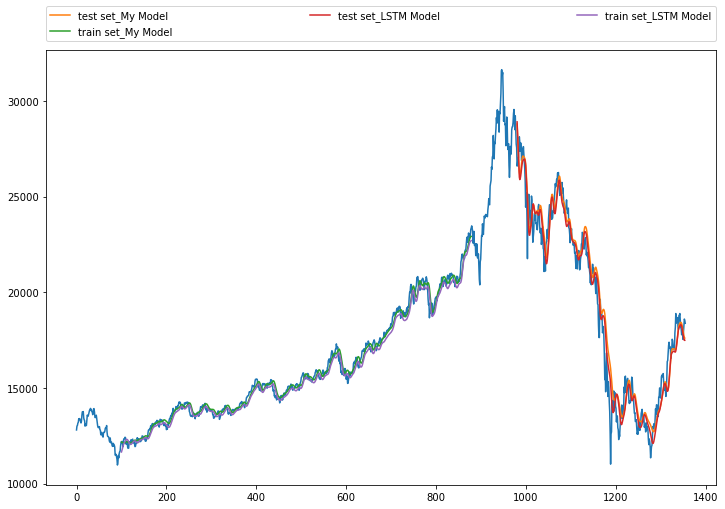

In [172]:
look_back=100
trainPredictPlot=np.empty_like(data)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
trainPredictPlot2=np.empty_like(data)
trainPredictPlot2[:,:]=np.nan
trainPredictPlot2[look_back:len(train_predict2)+look_back,:] = train_predict2

testPredictPlot=np.empty_like(data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1,:] = test_predict
testPredictPlot2=np.empty_like(data)
testPredictPlot2[:,:] = np.nan
testPredictPlot2[len(train_predict2)+(look_back*2)+1:len(data)-1,:] = test_predict2


plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data))
plt.plot(testPredictPlot,label="test set_My Model")
plt.plot(trainPredictPlot,label="train set_My Model")
plt.plot(testPredictPlot2,label="test set_LSTM Model")
plt.plot(trainPredictPlot2,label="train set_LSTM Model")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=3, mode="expand", borderaxespad=0.)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

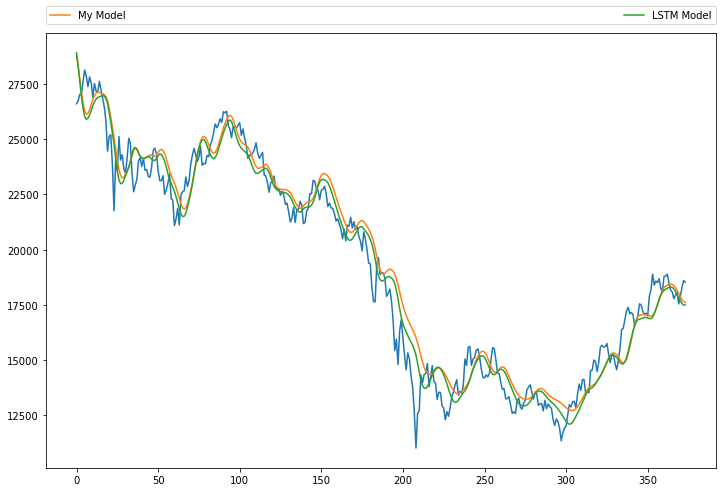

In [174]:
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data)[len(train_predict)+(look_back*2)+1:len(data)-1])
plt.plot(test_predict,label="My Model")
plt.plot(test_predict2,label="LSTM Model")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=3, mode="expand", borderaxespad=0.)
plt.show